In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


RSS (Residual Sum of Squares): Total sum of squared differences between predicted and actual values.
RMSE (Root Mean Squared Error): Average difference between predicted and actual values, in the same units as the target variable.
MSE (Mean Squared Error): Average squared difference between predicted and actual values.
R-squared (R²): Proportion of variance in the dependent variable explained by the independent variables.
Residuals: The differences between the observed values and the predicted values by a model. Essentially, they represent the errors made by the model in its predictions.
Norm Goal: To rescale features to a specific range, typically between 0 and 1.When you want to bring features to a common scale without distorting differences in the ranges of values or when the algorithm you're using requires data to be within a specific range.
Standard-To transform features to have zero mean and unit variance (standard deviation of 1).

In [ ]:
df= pd.read_csv("/content/Plant_2_Weather_Sensor_Data.csv",)
df1= pd.read_csv("/content/Plant_2_Generation_Data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
df1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


f sunlight is received at an irradiance of 1000W/m2 for 2 hours, 600W/m2 for 1.5 hours and 200W/m2 for 1 hour, the total radiation received that day is 3.1PSH:

1000W/m2 × 2 hours + 600W/m2 × 1.5 hours + 200W/m2 × 1 hour = 3100W/m2/day

3100W/m2/day ÷ 1000W/m2/day = 3.1PSH

In [ ]:
# PSH=1KW/m*m

In [ ]:
# AMBIENT_TEMPERATURE: Higher ambient temperatures can negatively impact the efficiency of solar panels, while lower temperatures generally improve efficiency.
# MODULE_TEMPERATURE: Similar to ambient temperature, higher module temperatures can reduce efficiency, while lower temperatures improve efficiency.
# IRRADIATION: The higher the irradiation, the more power the solar panels can generate.

In [ ]:
# AMBIENT_TEMPERATURE: This column likely represents the temperature of the surrounding air or environment where the solar plant is located. It's usually measured in degrees Celsius (°C) or Fahrenheit (°F).
# MODULE_TEMPERATURE: This column likely represents the temperature of the solar panels or modules themselves. It's typically higher than the ambient temperature due to the absorption of solar radiation. It's also measured in degrees Celsius (°C) or Fahrenheit (°F).
# IRRADIATION: This column represents the amount of solar radiation (sunlight) that is falling on the solar panels. It's typically measured in watts per square meter (W/m²) and is a key factor in determining the power output of a solar plant.


In [ ]:
df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0
3258,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [ ]:
df.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3254,False,False,False,False,False,False
3255,False,False,False,False,False,False
3256,False,False,False,False,False,False
3257,False,False,False,False,False,False


In [ ]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


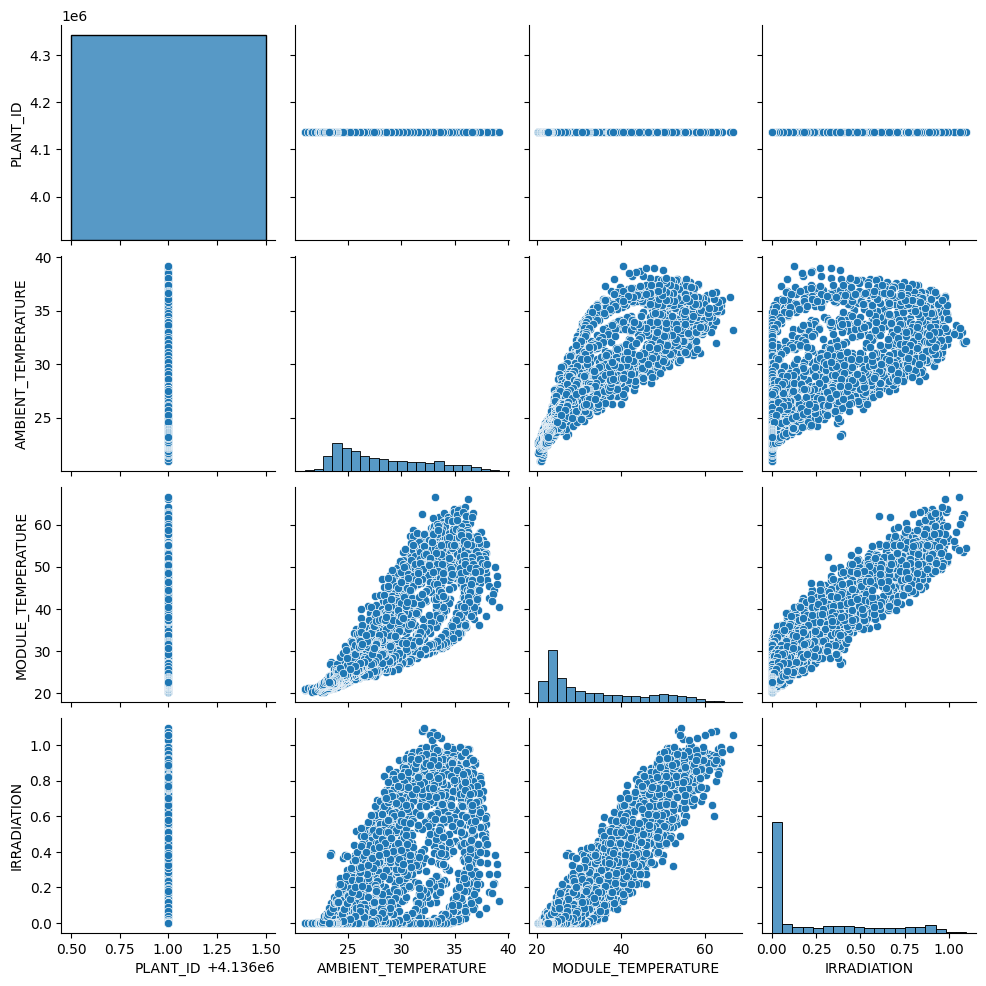

In [ ]:
sns.pairplot(df)

In [ ]:
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [ ]:
df1.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,2020-06-17 23:45:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


In [ ]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])
df1["DATE_TIME"] = pd.to_datetime(df1["DATE_TIME"])

In [ ]:
df["DATE_TIME"]

,DATE_TIME
0,2020-05-15 00:00:00
1,2020-05-15 00:15:00
2,2020-05-15 00:30:00
3,2020-05-15 00:45:00
4,2020-05-15 01:00:00
...,...
3254,2020-06-17 22:45:00
3255,2020-06-17 23:00:00
3256,2020-06-17 23:15:00
3257,2020-06-17 23:30:00


In [ ]:
m1 = pd.merge(df.drop(columns={"PLANT_ID"}, axis=1), df1.drop(columns={"PLANT_ID", "SOURCE_KEY"}, axis=1), on="DATE_TIME")

In [ ]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   AMBIENT_TEMPERATURE  67698 non-null  float64       
 3   MODULE_TEMPERATURE   67698 non-null  float64       
 4   IRRADIATION          67698 non-null  float64       
 5   DC_POWER             67698 non-null  float64       
 6   AC_POWER             67698 non-null  float64       
 7   DAILY_YIELD          67698 non-null  float64       
 8   TOTAL_YIELD          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.6+ MB


In [ ]:
m1.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,0.0,0.0,3177.000000,1.994153e+07


In [ ]:
m1["DATE"] = pd.to_datetime(m1["DATE_TIME"]).dt.date
m1["TIME"] = pd.to_datetime(m1["DATE_TIME"]).dt.time
m1['DAY'] = pd.to_datetime(m1['DATE_TIME']).dt.day
m1['MONTH'] = pd.to_datetime(m1['DATE_TIME']).dt.month
m1['YEAR'] = pd.to_datetime(m1['DATE_TIME']).dt.year
m1['HOUR'] = pd.to_datetime(m1['DATE_TIME']).dt.weekday

In [ ]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
m1['SOURCE_KEY'] = la.fit_transform(m1['SOURCE_KEY'])

In [ ]:
m1.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,DAY,MONTH,YEAR,HOUR
0,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,00:00:00,15,5,2020,4
1,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,0.000000,1.215279e+09,2020-05-15,00:00:00,15,5,2020,4
2,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,00:00:00,15,5,2020,4
3,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,269.933333,1.704250e+06,2020-05-15,00:00:00,15,5,2020,4
4,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,00:00:00,15,5,2020,4


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

               feature       VIF
0          DAILY_YIELD  2.691688
1          TOTAL_YIELD  1.826100
2  AMBIENT_TEMPERATURE  5.381151
3          IRRADIATION  1.957759


(X - X_mean) / Std_Dev

In [ ]:
X = m1[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','IRRADIATION'	]]
y=m1['AC_POWER']

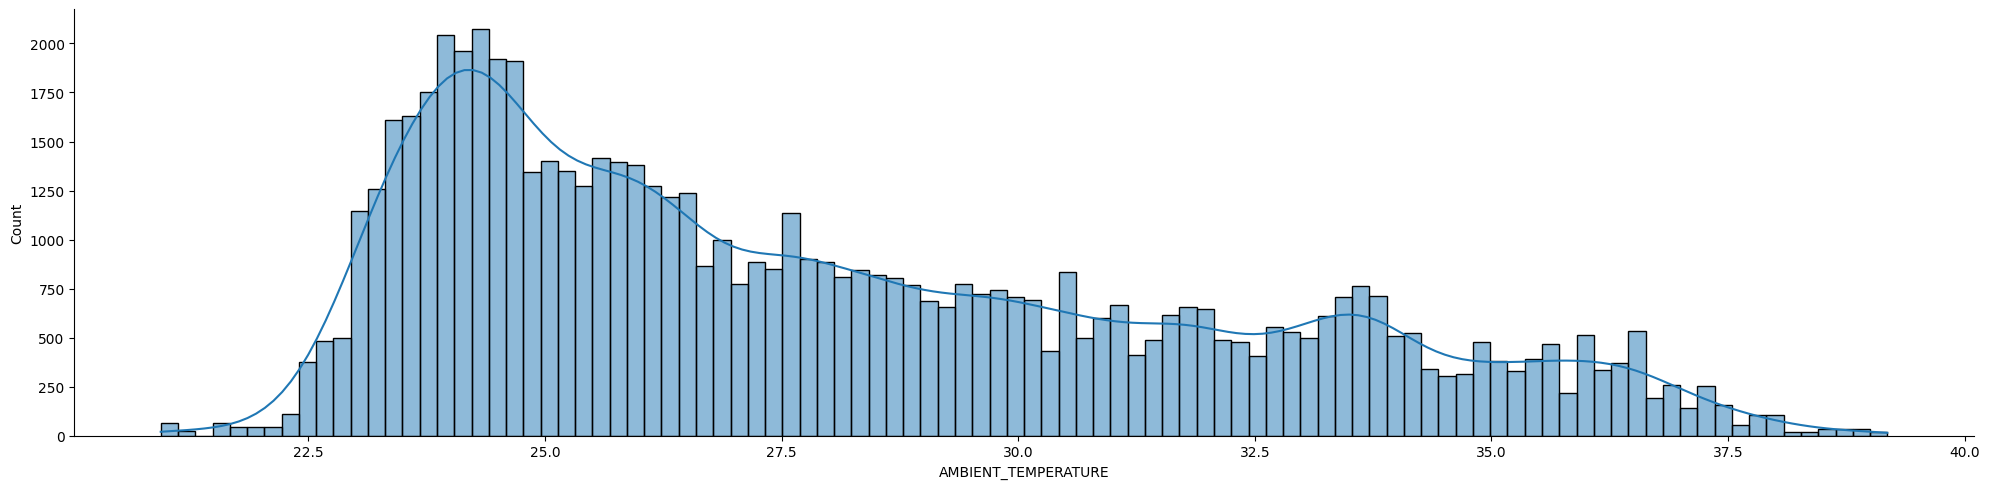

In [ ]:
sns.displot(data= m1, x="AMBIENT_TEMPERATURE", kde= True, bins = 100, height=5, aspect=4)

In [ ]:
ac_total = m1.groupby(["DATE"])[["AC_POWER"]].sum().add_suffix("_total")
dc_total = m1.groupby(["DATE"])[["DC_POWER"]].sum().add_suffix("_total")

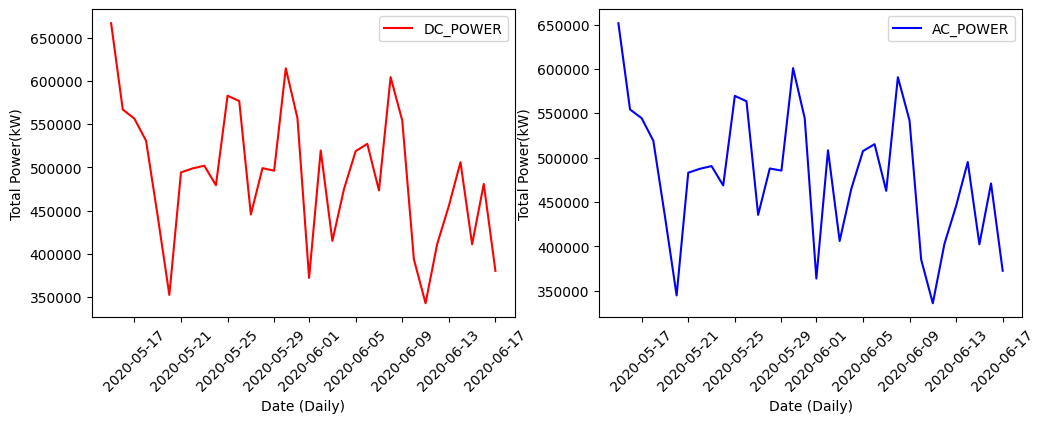

In [ ]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2)

sns.lineplot(dc_total["DC_POWER_total"], label = "DC_POWER", color="red", ax=axs[0], ci = None)
axs[0].tick_params(axis = "x", labelrotation = 45)
axs[0].set(ylabel = "Total Power(kW)", xlabel = "Date (Daily)")
sns.lineplot(ac_total["AC_POWER_total"], label = "AC_POWER", color="blue", ax=axs[1], ci = None)
axs[1].tick_params(axis = "x", labelrotation = 45)
axs[1].set(ylabel = "Total Power(kW)", xlabel = "Date (Daily)")
plt.show()

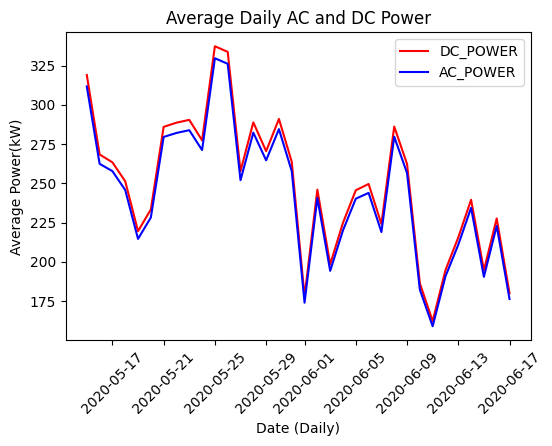

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(data= m1, x = "DATE", y= "DC_POWER", label = "DC_POWER", color="red", ax=ax, ci = None)
sns.lineplot(data= m1, x = "DATE", y= "AC_POWER", label = "AC_POWER", color="blue", ax=ax, ci =None)
ax.set_title("Average Daily AC and DC Power")
plt.xlabel("Date (Daily)")
plt.ylabel("Average Power(kW)")
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [ ]:
dc_to_ac_perc = (100* ac_total["AC_POWER_total"]) / (dc_total["DC_POWER_total"])

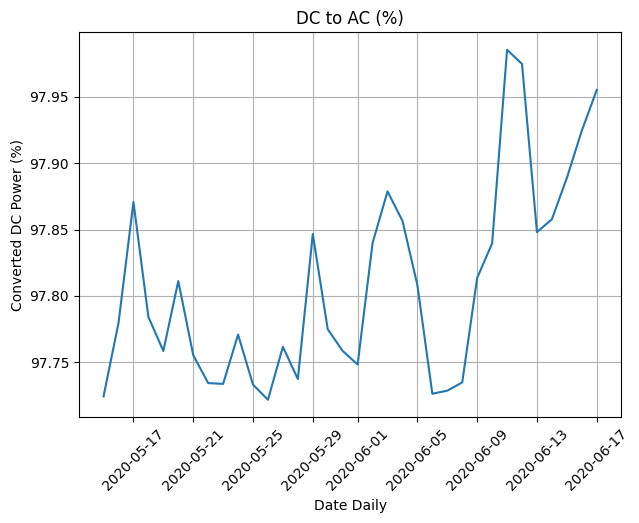

In [ ]:
plt.figure(figsize=(7, 5))
dc_to_ac_perc.plot()
plt.title("DC to AC (%)")
plt.xlabel("Date Daily")
plt.ylabel("Converted DC Power (%)")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Sorted Total AC_Power')

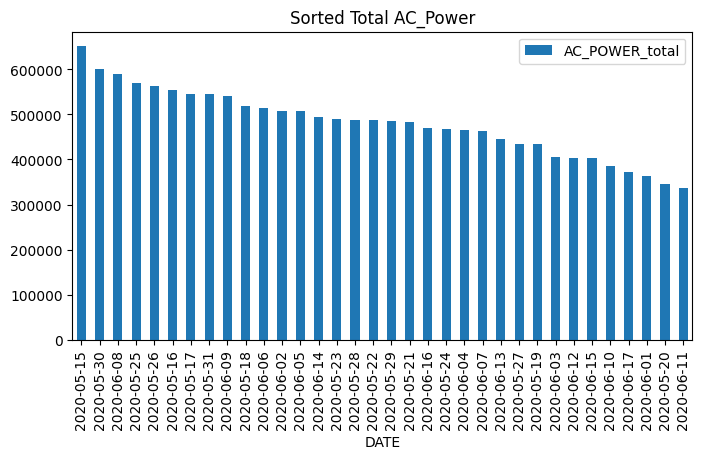

In [ ]:
plt.subplots(figsize=(8,4))
ac_total["AC_POWER_total"].sort_values(ascending=False).plot(kind="bar", legend=True)
plt.title("Sorted Total AC_Power")

In [ ]:
m1.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,DAY,MONTH,YEAR,HOUR
0,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,00:00:00,15,5,2020,4
1,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,0.000000,1.215279e+09,2020-05-15,00:00:00,15,5,2020,4
2,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,00:00:00,15,5,2020,4
3,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,269.933333,1.704250e+06,2020-05-15,00:00:00,15,5,2020,4
4,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,00:00:00,15,5,2020,4


In [ ]:
# prompt: drop date time dat month year hour

m1 = m1.drop(columns=['DATE','TIME'])

In [ ]:
m1.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,MONTH,YEAR,HOUR
0,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,9425.000000,2.429011e+06,15,5,2020,4
1,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,0.000000,1.215279e+09,15,5,2020,4
2,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,3075.333333,2.247720e+09,15,5,2020,4
3,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,269.933333,1.704250e+06,15,5,2020,4
4,2020-05-15,0,27.004764,25.060789,0.0,0.0,0.0,3177.000000,1.994153e+07,15,5,2020,4


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
X = m1[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','IRRADIATION'	]]
y=m1['AC_POWER']

Scatter Plot
Purpose: Shows the relationship between two numerical variables.

Analysis: This plot helps visualize how changes in ambient temperature might affect AC power generation. You can observe if there's a positive or negative correlation between the two variables.


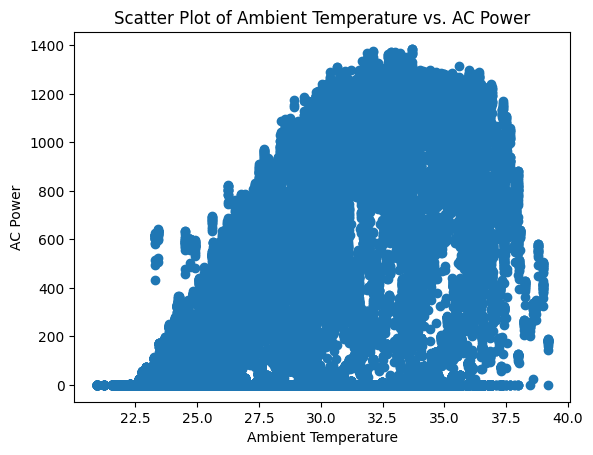

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(m1['AMBIENT_TEMPERATURE'], m1['AC_POWER'])
plt.xlabel('Ambient Temperature')
plt.ylabel('AC Power')
plt.title('Scatter Plot of Ambient Temperature vs. AC Power')
plt.show()

Insight: There is a negative correlation between ambient temperature and AC power generation. As the ambient temperature increases, the AC power output tends to decrease. This could be due to the reduced efficiency of solar panels at higher temperatures.

Purpose: Displays the distribution of a single numerical variable.This plot shows the frequency of different daily yield values. You can identify the most common ranges and potential outliers.

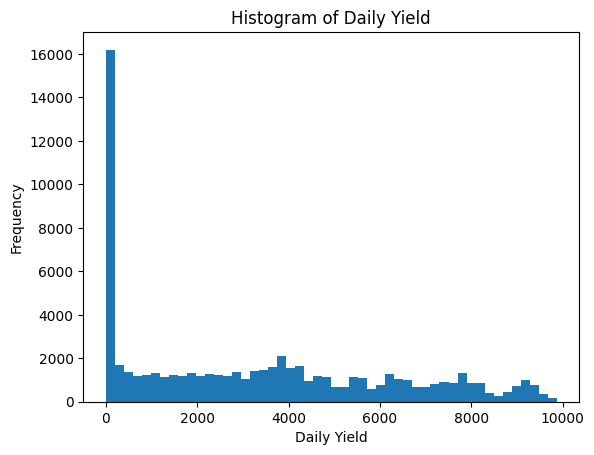

In [ ]:
import matplotlib.pyplot as plt
plt.hist(m1['DAILY_YIELD'], bins=50)
plt.xlabel('Daily Yield')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Yield')
plt.show()

Insight: The distribution of daily yield is slightly skewed to the right. Most of the daily yield values fall within a specific range, but there are some outliers with exceptionally high yields. This suggests that there might be certain days or periods with favorable conditions for solar power generation.

Box Plot
Purpose: Compares the distribution of a numerical variable across different categories.                        Analysis: This plot compares the AC power generation across different months. It reveals the median, quartiles, and potential outliers for each month.

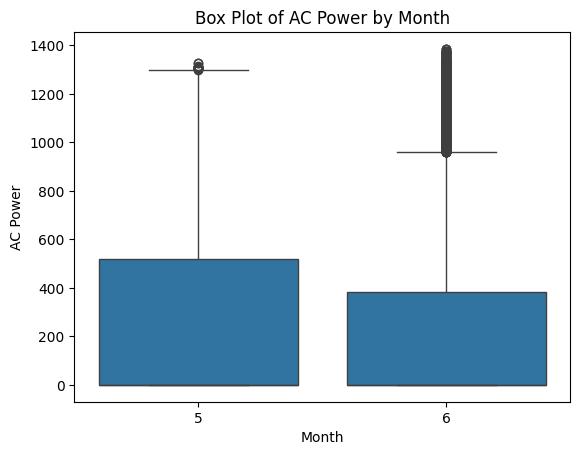

In [ ]:
import seaborn as sns
sns.boxplot(x='MONTH', y='AC_POWER', data=m1)
plt.xlabel('Month')
plt.ylabel('AC Power')
plt.title('Box Plot of AC Power by Month')
plt.show()

Insight: AC power generation varies across different months. The median AC power is generally higher during the summer months (June, July, August) and lower during the winter months (December, January, February). This is likely due to the difference in solar radiation levels and daylight hours between seasons.

Purpose: Shows the trend of a variable over time.                                  
 Analysis: This plot helps identify patterns or fluctuations in AC power generation over a specific period.

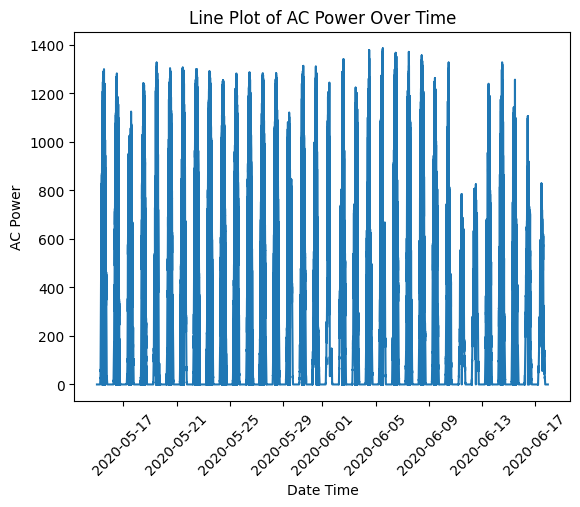

In [ ]:
import matplotlib.pyplot as plt
plt.plot(m1['DATE_TIME'], m1['AC_POWER'])
plt.xlabel('Date Time')
plt.ylabel('AC Power')
plt.title('Line Plot of AC Power Over Time')
plt.xticks(rotation=45)
plt.show()

Insight: There are daily and seasonal patterns in AC power generation. The power output typically increases during the daytime hours and decreases during the nighttime hours. There are also noticeable fluctuations in power output throughout the year, reflecting seasonal variations in solar radiation.

Purpose: Visualizes the correlation between multiple numerical variables.                                  
 Analysis: This plot highlights the strength and direction of relationships between different variables. You can identify which variables are strongly correlated and potentially influence AC power generation.

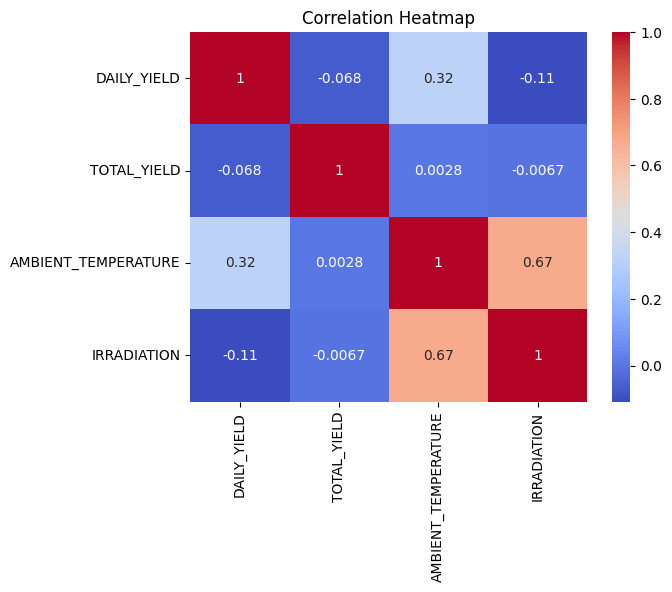

In [ ]:
import seaborn as sns
correlation_matrix = m1[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Insight: Daily yield, total yield, and irradiation are positively correlated with AC power generation. This indicates that higher values of these variables tend to result in higher AC power output. Ambient temperature is negatively correlated with AC power, confirming the observation from the scatter plot.

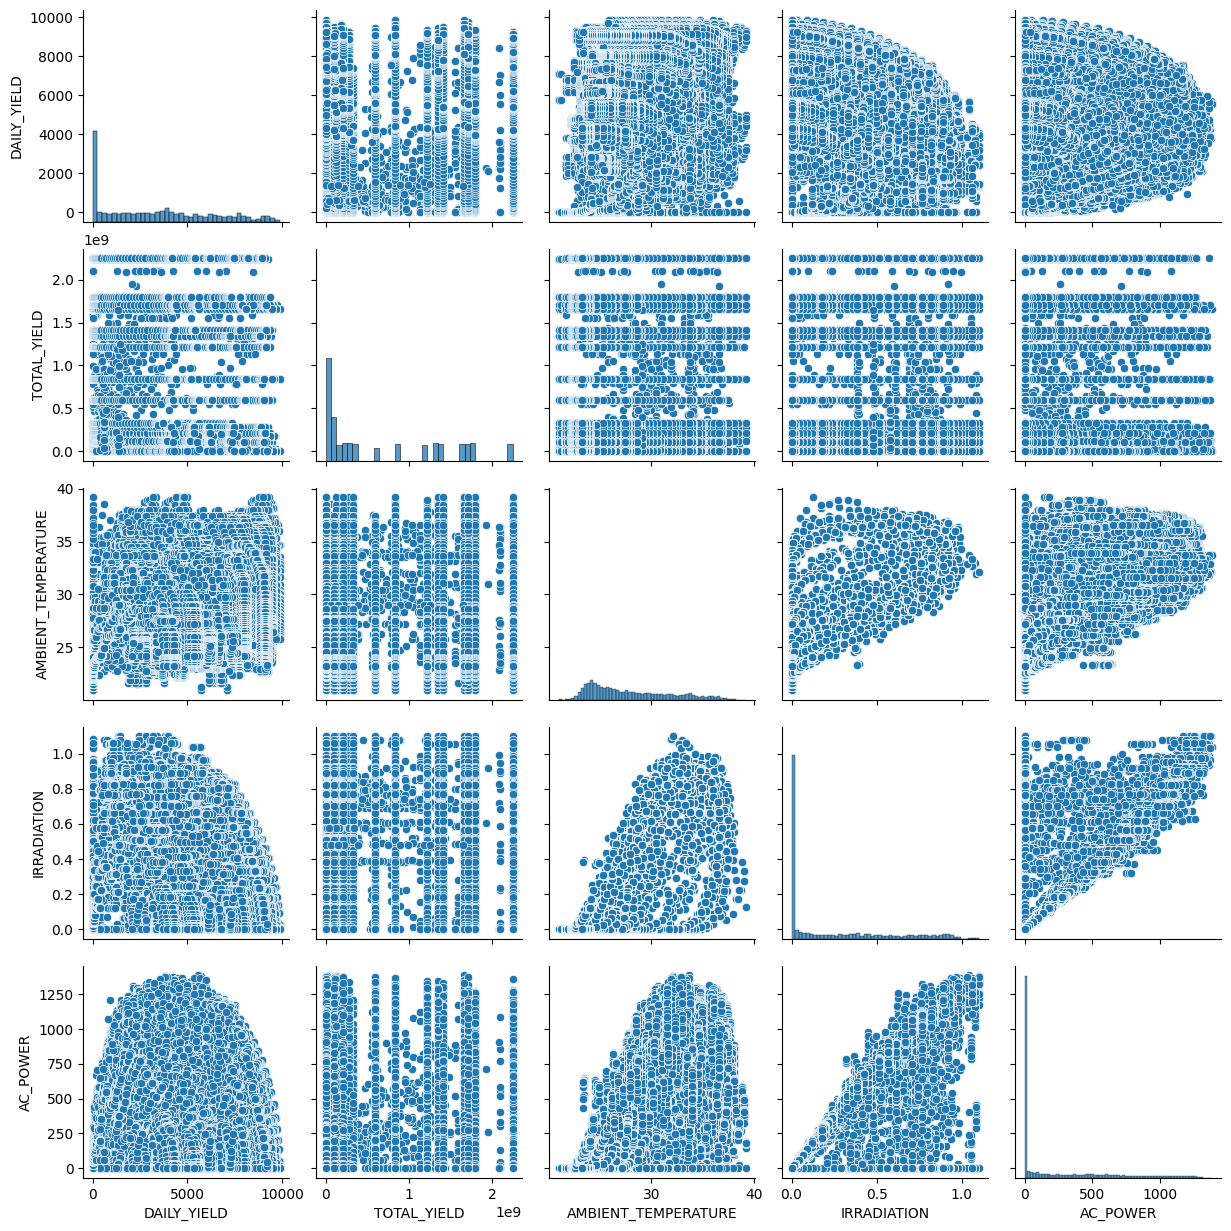

In [ ]:
import seaborn as sns
sns.pairplot(m1[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION', 'AC_POWER']])
plt.show()